# 5. AND 로직 연산 학습하기

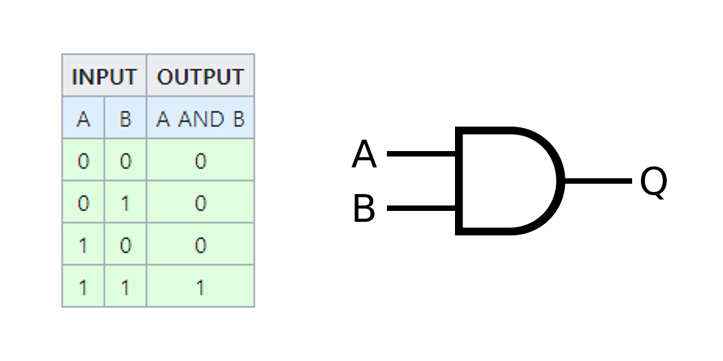!

AND 연산은 논리 연산(Logic operation)의 한 종류로 위의 그림과 같이 두 상태가 모두 (True, 1)일 때 참이고,

둘 중 하나라도 거짓 (False, 0)이라면 거짓이 되는 연산입니다.

전기 신호가 0과 1로 구성되어 있는 디지털 회로에서는 트랜지스터 게이트의 조합으로 구현할 수 있습니다.

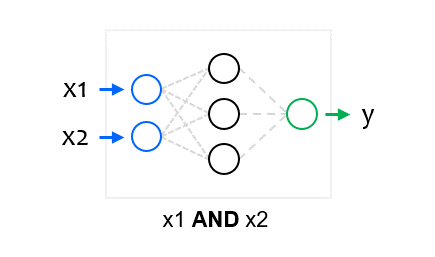

위 그림은 두개의 입력값을 받고, 하나의 값을 출력하는 간단한 **인공신경망(Artificial Neural Network)**을 나타냅니다.

이제 Tensorflow를 이용해서 두 입력값에 대해 AND 논리 연산의 결과를 출력하는 신경망을 구현해보겠습니다.

# 1) 훈련 데이터 준비하기

In [11]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

tf.random.set_seed(0)

# 1. 훈련 데이터 준비하기
x_train = [[0,0],[0,1],[1,0],[1,1]]
y_train = [[0],[0],[0],[1]]

우선 tf.random모듈의 set_seed()함수를 사용해서 랜덤 시드를 설정했습니다.

예제에서 x_train, y_train은 각각 훈련에서 사용할 입력값, 출력값입니다.

# 2) Neural Network 구성하기

In [12]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# input_shape = [2] : 입력층은 두개여서
# units = 3 : 은닉층 뉴런 3개
# units = 1 : 출력층 뉴런 1개
model = keras.Sequential([keras.layers.Dense(units = 3, input_shape = [2], activation = 'relu'),
                         keras.layers.Dense(units = 1)
                         ])

tf.keras 모듈의 Sequential 클래스는 Neural Network의 각 층을 순서대로 쌓을 수 있도록 합니다.

tf.keras.layers 모듈의 Dense 클래스는 완전히 연결된(완전 연결된) 뉴런층을 구성합니다.

두 개의 Dense를 사용해서 아래 그림과 같은 구조의 신경망을 구성했습니다.

은닉층(Hidden layer)의 활성화함수로 ReLU(Rectified Linear Unit)를 사용했습니다.

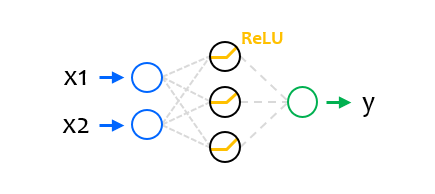

# 3) Neural Network 컴파일하기

In [13]:
# 3. 모델 컴파일하기
model.compile(loss ='mse', optimizer = 'Adam')

손실 함수로 'mse', 옵티마이저를 'Adam'을 지정했습니다.

# 4) Neural Network 훈련하기

In [14]:
# 4. 모델 훈련하기
pred_before_training = model.predict(x_train)
print('Befor training: \n', pred_before_training)

history = model.fit(x_train, y_train, epochs = 1000, verbose = 0)
pred_after_training = model.predict(x_train)
print('After training: \n', pred_after_training)

tf.keras 모듈의 Model 클래스는 predict() 메서드를 포함합니다.

predict()메서드를 이용해서 Neural Network의 예측값(predicted value)을 얻을 수 있습니다.

Model 클래스의 fit()메서드는 모델을 훈련하고, 훈련 진행 상황과 현재의 손실값을 반환합니다.

모델 훈련의 전후로 입력 데이터에 대한 Neural Network의 에측값을 출력하도록 했습니다.

# 5) 손실값 확인하기

In [24]:
# 5. 손실값 확인하기

import matplotlib.pyplot as plt

loss = history.history['loss']
plt.plot(loss)
plt.xlabel('epoch', labelpad = 15) # labelpad는 x라벨과 그래프 사이의 거리를 띄우는데 사용
plt.ylabel('loss', labelpad = 105) # labelpad는 y라벨과 그래프 사이의 거리를 띄우는데 사용
plt.show()

# 6) 훈련 결과 확인하기

In [28]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot') # 그래프 시트 설정 - ggplot 시트
# plt.figure(figsize = (6,4))
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['font.size'] = 12

plt.plot(pred_before_training, 's-', markersize = 10, label = 'pred_before_training') # 's-' : 사각형 점, - 선 연결형태, markersize : 점 크기, label 라벨이름
plt.plot(pred_after_training, 'd-', markersize = 10, label = 'pred_after_training')
plt.plot(y_train, 'o-', markersize = 10, label = 'y_train')

plt.xticks(np.arange(4), labels = ['[0,0]','[0,1]','[1,0]','[1,1]'])
plt.xlabel('input (x_train)', labelpad = 15)
plt.ylabel('output (y_train)', labelpad = 15)

plt.legend() # 범례 표시 (출력)
plt.show()